# Lekcja 2. Graficzna prezentacja danych

Przedstawianie danych w postaci długich tabel pełnych liczb zwykle nie jest najlepszym sposobem na ich prezentację, szczególnie jeśli wiąże się ona z próbą przekazania pewnych idei czy ogólnych informacji. Możliwość syntetycznej wizualizacji tych danych jest niezwykle istotna, na szczęście python posiada rozbudowane narzędzia, pozwalające na graficzną prezentację danych w szybki i wygodny sposób. 

## Biblioteka `matplotlib`

Podstawowym pakietem narzędzi wizualizacyjnych pythona jest biblioteka `matplotlib`. Jest to bardzo rozbudowany pakiet. W bieżącej lekcji zapoznamy się jedynie z podstawowymi i najczęściej używanymi możliwościami `matplotliba`.

W celu użycia bibliotekę należy wczytać, importując jeden z jej funkcjonalnych modułów, na przykład `pyplot`, stanowiący swego rodzaju interfejs dostępowy. W przypadku interaktywnego użycia, na przykład w środowisku jupyter, warto również wykonać dodatkowe polecenie powodujące wyświetlanie obrazów bezpośrednio na ekranie (zamiast domyślnego zapisywania plików graficznych na dysku):





In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Od tego momentu możemy korzystać z wszystkich możliwości `matplotlib`.

## Wykresy dwuwymiarowe

Spróbujmy narysować prosty wykres. Zbudujmy dwie listy, jedną zawierającą współrzędne $x$ punktów, oraz drugą zawierającą współrzędne $y$.
Następnie stwórzmy wykres i wyświetlmy go:

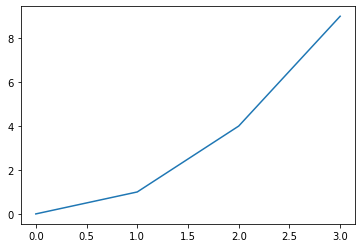

In [ ]:
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
plt.plot(x, y)
plt.show()


Jak widać, punkty zostały automatycznie połączone odcinkami. Niestety wykres jest dość ,,kanciasty'', aby go wygładzić, można zagęścić punkty. W tym celu wykorzystamy polecenie z pakietu numpy, które tworzy tablicę równomiernie rozmieszczonych punktów (w matematyce nazywa się to przestrzenią wektorową lub przestrzenią liniową, stąd nazwa funkcji). Następnie stworzymy wykres funkcji $y=x^2$.

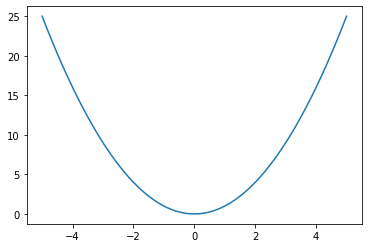

In [ ]:
import numpy as np

x = np.linspace(-5,5, 100)
plt.plot(x, x**2)
plt.show()


Możemy też wyświetlić kilka wykresów jednocześnie:

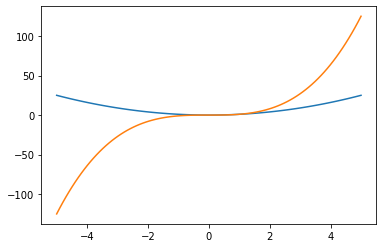

In [ ]:
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.show()

Możemy ręcznie ustawiać wszystkie parametry graficzne, ale lepiej wykorzystać jeden z wbudowanych stylów. Dostępne style możemy wyświetlić poleceniem `print(plt.style.available)
` 

In [ ]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Wybrany styl możemy ustawić poleceniem `plt.style.use('styl')
`

In [ ]:
plt.style.use('seaborn-poster')


Dodajmy więcej elementów: *tytuł* wykresu, *etykiety* poszczególnych krzywych oraz ich *legendę*, *podpisy osi* a także ustawmy zakres osi. Zmieńmy także wygląd krzywych, ustawiając *kolor*, dodając *znaczniki* i zmieniając wygląd *linii*:

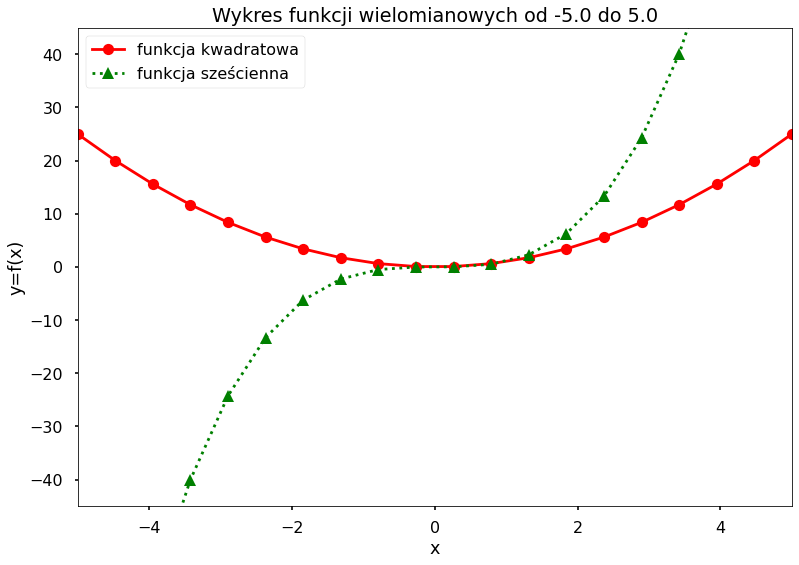

In [ ]:
x = np.linspace(-5,5, 20)

plt.title(f'Wykres funkcji wielomianowych od {x[0]} do {x[-1]}')
plt.xlim(-5,5)
plt.ylim(-45,45)
plt.plot(x, x**2, marker='o', linestyle='-', color='red', label='funkcja kwadratowa')
plt.plot(x, x**3, marker='^', linestyle=':', color='green', label='funkcja sześcienna')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y=f(x)')

plt.show()

## Animacje

Jedną z bardzo efektownych funkcjonalności pakietu `matplotlib` jest możliwość tworzenia interaktywnych animacji. Prześledźmy to na poniższym przykładzie.

Najpierw musimy wczytać odpowiednie biblioteki:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline

Następnie ustawmy parametry obrazka:

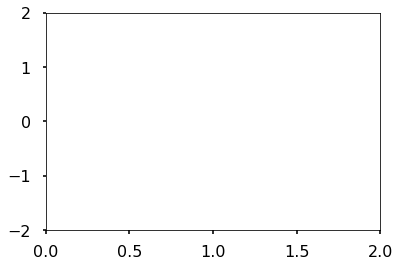

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

Zdefiniowaliśmy zakresy osi oraz obiekt `line`, który służy do rysowania wykresu. Zwróćmy uwagę, że jest on pusty, wypełnimy go danymi później.

Zdefiniujmy funkcję rysującą tło dla każdej klatki animacji:

In [ ]:
def init():
    line.set_data([], [])
    return line,


Funkcja `init()` tworzy podstawę do rysowania każdej klatki naszej animacji. Tutaj znowu mamy puste dane, jednak ważne jest, żeby funkcja zwracała obiekt `line`. To informuje animatora, który element należy odświeżać przy tworzeniu animacji.

Zdefiniujmy funkcję odpowiedzialną za samo tworzenie animacji:


In [ ]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


Funkcja animacji przyjmuje pojedynczy argument `i` i tworzy naszą krzywą (sinusoidę) przesuniętą o wartość zależną od `i`. Zwróćmy uwagę, że funkcja również zwraca obiekt `line`, czyli ten, który musimy przerysować dla każdej klatki animacji.

Wywołajmy tę funkcję: 

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


Obiekt ten musi być trwały, więc przypisujemy go do zmiennej `anim`. Wybraliśmy 100 klatek animacji z odstępem `20ms` pommiędzy kolejnymi klatkami. Parametr `blit=True` powoduje, że przerysowywane są jedynie te fragmenty rysunku, które się zmieniły. Oszczędza to czas tworzenia animacji a także powoduje, że rezultat jest płynniejszy (nie widać nieprzyjemnego migotania).

Ostatnim krokiem jest faktyczne renderowanie i wyświetlenie otrzymanej animacji. W notatniku jupytera użyjemy do tego odpowiedniej funkcjonalności HTML5. Możemy również wygenerować film i zapisać w pliku wideo (np. mp4). 

> **Uwaga!** Wywołanie tego polecenia może potrwać dłuższą chwilę, czekaj cierpliwie!

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Podsumowanie

Jak już wspomniano, biblioteka `matplotlib` jest bardzo rozbudowanym pakietem o wielu możliwościach. Ich szybki przegląd jest dostępny w [galerii](https://matplotlib.org/stable/gallery/index.html). Można również skorzystać z różnorodnych [samouczków](https://matplotlib.org/stable/tutorials/index.html) czy wreszcie [pełnej dokumentacji](https://matplotlib.org/stable/contents.html). Gorąco zachęcamy do samodzielnych eksperymentów.